### **Imputations in Machine Learning**

* Imputation in machine learning refers to the process of filling in or replacing missing or null values in a dataset with estimated values. This is important because many machine learning algorithms cannot handle missing data and will either throw an error or fail to train effectively when encountering null values.
* This guide explains how to handle missing values in a dataset through imputation techniques for both numerical and categorical columns. Visualizations like histograms, KDE plots, and count plots are used for verification.
* Imputation helps make the data complete, enabling models to function properly.

* Datafile link : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### Importing Necessary libraries

In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Performing Analysis to know insights

In [3]:
df = pd.read_csv("E:\\Machine Learning\\House_Price_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df1= df.copy()
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.shape

(1460, 81)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Seperating the columns

In [16]:
Numerical_columns = df.select_dtypes( exclude = ['object']).columns
print(Numerical_columns)
print("--------------------------------------------------------------------")

Categorical_columns = df.select_dtypes(include = ['object']).columns
(Categorical_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
--------------------------------------------------------------------


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
df[Numerical_columns].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


### Imputation on Datacolumns

* Imputation is a technique used to handle missing values in a dataset by replacing them with estimated values based on the data distribution. It is crucial for ensuring that machine learning models or statistical analyses can be applied without issues caused by missing data.


### Common Imputation Strategies:
- **Mean Imputation**: Replacing missing values with the column's mean (numerical data).
- **Median Imputation**: Replacing missing values with the column's median (numerical data).
- **Most Frequent Imputation**: Replacing missing values with the column's mode (categorical data).
- **Constant Imputation**: Replacing missing values with a fixed value (e.g., `0` or `'unknown'`).


In [21]:
df[Numerical_columns].isnull().sum().sort_values(ascending = False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
LotArea            0
MSSubClass         0
Id                 0
OverallCond        0
OverallQual        0
YearRemodAdd       0
YearBuilt          0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
BsmtFinSF1         0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
1stFlrSF           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [22]:
df[Categorical_columns].isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageFinish       81
GarageQual         81
GarageType         81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
Condition1          0
Condition2          0
LotShape            0
Street              0
MSZoning            0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
RoofStyle           0
Heating             0
ExterCond           0
Foundation          0
HouseStyle          0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
BldgType            0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
SaleType            0
SaleCondition       0
dtype: int64

**Imputations on Numerical columns**

* Numerical columns typically require strategies like mean or median imputation. Verification is performed using histograms and KDE plots to ensure the distribution remains consistent after imputation.
* To know the skewness of the data graphically we can use this code : 
**sns.histplot(df[column_to_check], kde=True, bins=10, color='skyblue', alpha=0.7)**

In [106]:
print(df['LotFrontage'].mean())
print(df['LotFrontage'].median())

70.04995836802664
70.04995836802665


In [28]:
mean = df['LotFrontage'].mean()
df['LotFrontage'] = df['LotFrontage'].fillna(mean)
df['LotFrontage'].isnull().sum()

np.int64(0)

<Axes: xlabel='LotFrontage', ylabel='Count'>

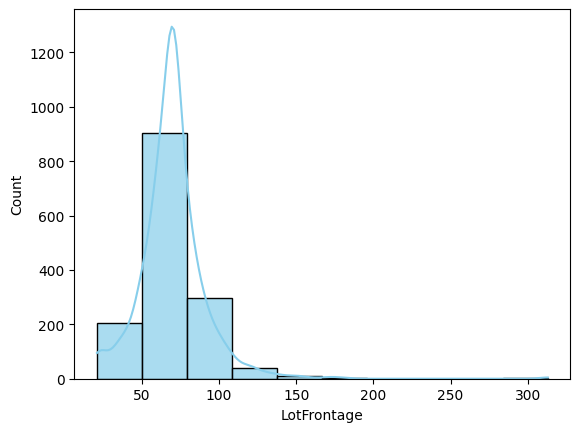

In [107]:
sns.histplot(df['LotFrontage'], kde=True, bins=10, color='skyblue', alpha=0.7)

In [34]:
print(df['GarageYrBlt'].mean())
print(df['GarageYrBlt'].median())

1978.5061638868744
1980.0


In [35]:
median = df['GarageYrBlt'].median()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(median)
df['GarageYrBlt'].isnull().sum()

np.int64(0)

<Axes: xlabel='GarageYrBlt', ylabel='Count'>

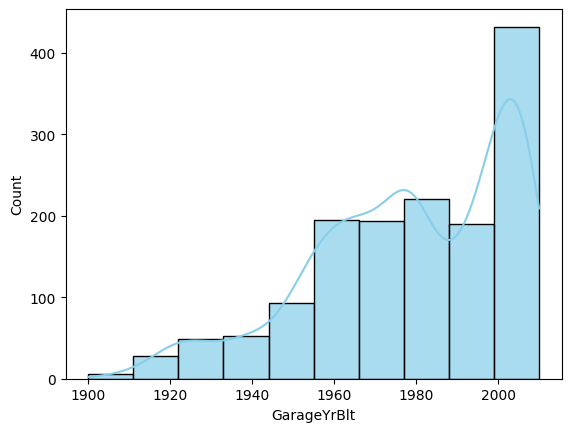

In [109]:
sns.histplot(df['GarageYrBlt'], kde=True, bins=10, color='skyblue', alpha=0.7)

In [37]:
print(df['MasVnrArea'].mean())
print(df['MasVnrArea'].median())

103.68526170798899
0.0


In [39]:
for col in ['MasVnrArea']:
    df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace = True)

C:\Users\gkris\AppData\Local\Temp\ipykernel_22128\2187250594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace = True)


<Axes: xlabel='MasVnrArea', ylabel='Count'>

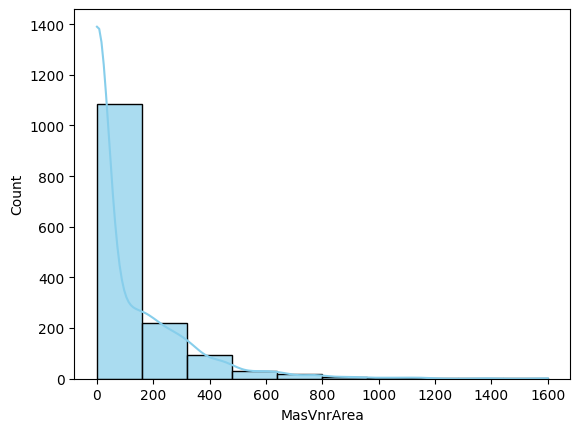

In [110]:
sns.histplot(df['MasVnrArea'], kde=True, bins=10, color='skyblue', alpha=0.7)

**Imputations on categorical columns**

* Categorical columns are imputed using strategies like most frequent or constant value replacement. Verification is done using count plots and histograms.

<Axes: xlabel='MiscFeature', ylabel='count'>

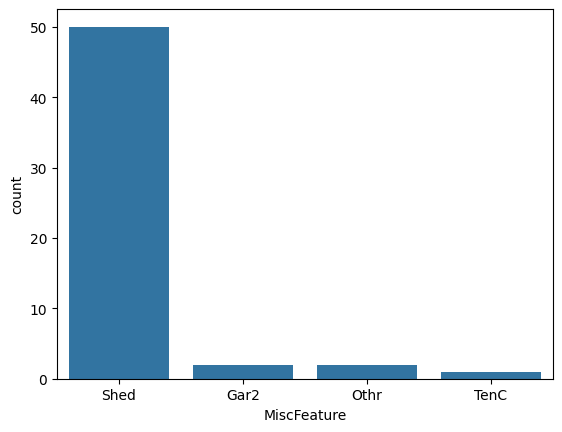

In [47]:
import seaborn as sns
sns.countplot(x = 'MiscFeature', data = df)

In [43]:
print(df['MiscFeature'].mode())

0    Shed
Name: MiscFeature, dtype: object


In [48]:
df['MiscFeature'] = df['MiscFeature'].fillna('Shed')
df['MiscFeature'].isnull().sum()

np.int64(0)

<Axes: xlabel='MiscFeature', ylabel='Count'>

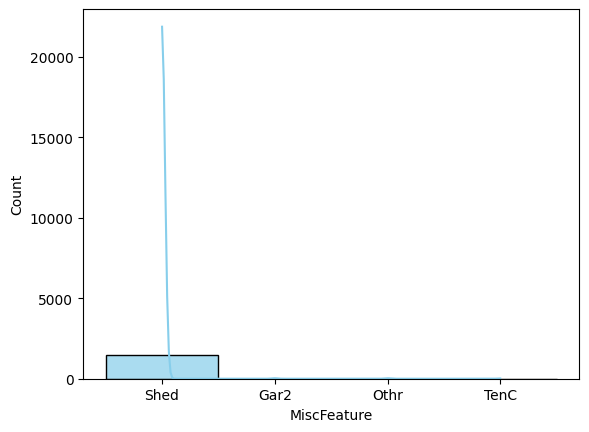

In [111]:
sns.histplot(df['MiscFeature'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    Grvl
Name: Alley, dtype: object


<Axes: xlabel='Alley', ylabel='count'>

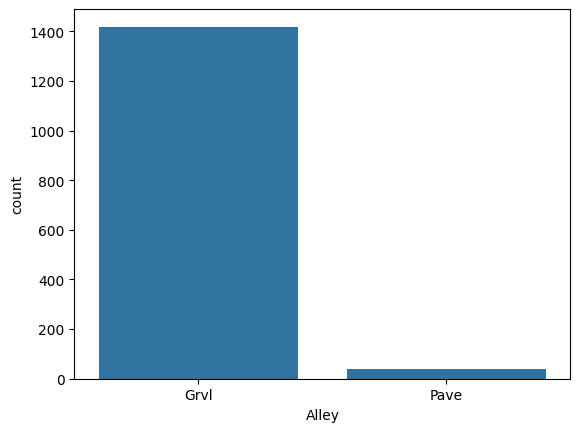

In [53]:
print(df['Alley'].mode())
sns.countplot(x= 'Alley', data = df)


In [52]:
df['Alley'] = df['Alley'].fillna('Grvl')
df['Alley'].isnull().sum()

np.int64(0)

<Axes: xlabel='Alley', ylabel='Count'>

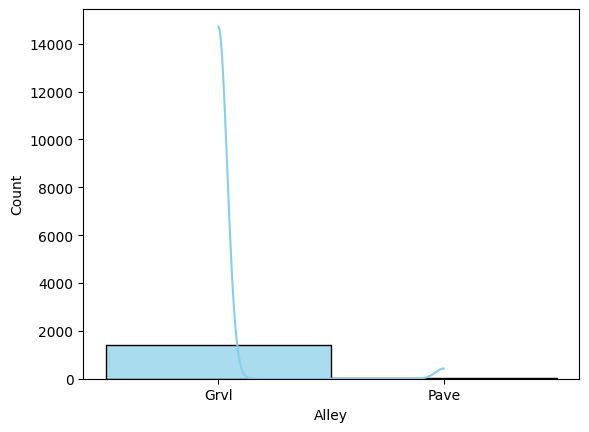

In [112]:
sns.histplot(df['Alley'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    MnPrv
Name: Fence, dtype: object


<Axes: xlabel='Fence', ylabel='count'>

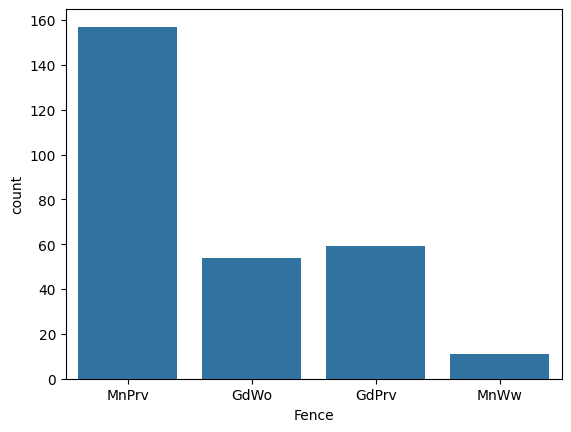

In [54]:
print(df['Fence'].mode())
sns.countplot( x = 'Fence', data = df)

In [55]:
df['Fence'] = df['Fence'].fillna('MnPrv')
df['Fence'].isnull().sum()

np.int64(0)

<Axes: xlabel='Fence', ylabel='Count'>

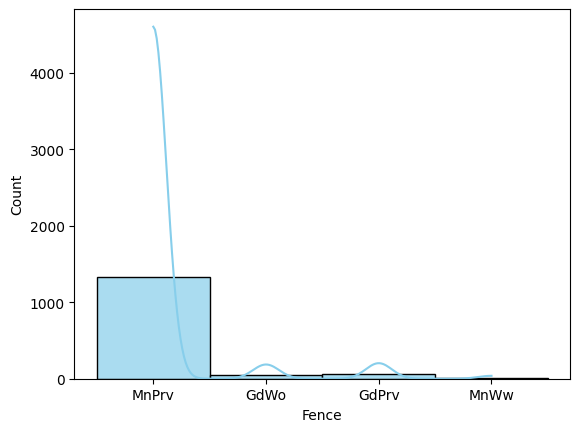

In [113]:
sns.histplot(df['Fence'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    BrkFace
Name: MasVnrType, dtype: object


<Axes: xlabel='MasVnrType', ylabel='count'>

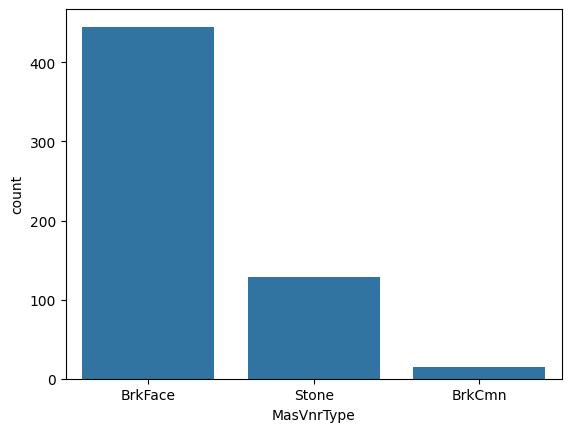

In [56]:
print(df['MasVnrType'].mode())
sns.countplot(x = 'MasVnrType', data = df)

In [57]:
df['MasVnrType'] = df['MasVnrType'].fillna('BrkFace')
df['MasVnrType'].isnull().sum()

np.int64(0)

<Axes: xlabel='MasVnrType', ylabel='Count'>

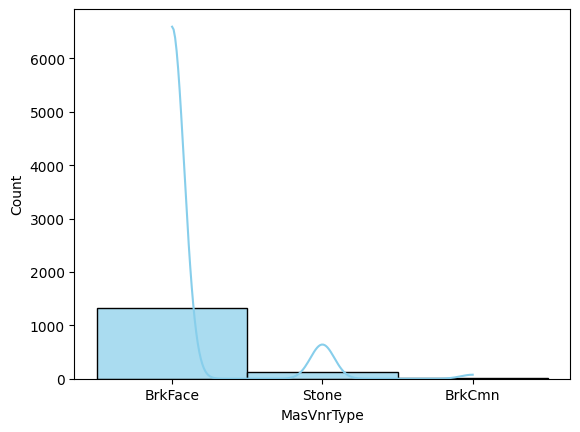

In [114]:
sns.histplot(df['MasVnrType'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    Gd
Name: FireplaceQu, dtype: object


<Axes: xlabel='FireplaceQu', ylabel='count'>

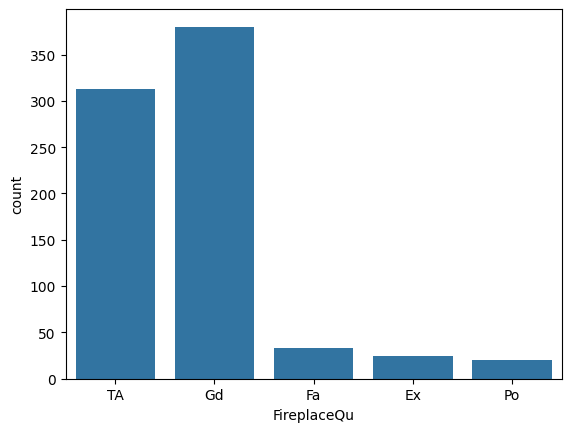

In [58]:
print(df['FireplaceQu'].mode())
sns.countplot( x= 'FireplaceQu', data = df)

In [59]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('Gd')
df['FireplaceQu'].isnull().sum()

np.int64(0)

<Axes: xlabel='FireplaceQu', ylabel='Count'>

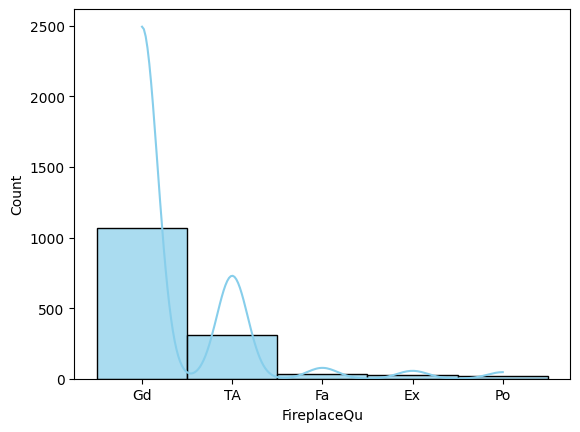

In [115]:
sns.histplot(df['FireplaceQu'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    Attchd
Name: GarageType, dtype: object


<Axes: xlabel='GarageType', ylabel='count'>

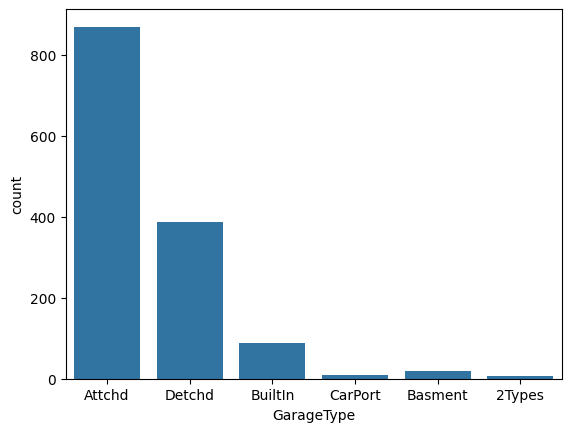

In [60]:
print(df['GarageType'].mode())
sns.countplot(x = 'GarageType', data = df)

In [61]:
df['GarageType'] = df['GarageType'].fillna('Attchd')
df['GarageType'].isnull().sum()

np.int64(0)

<Axes: xlabel='GarageType', ylabel='Count'>

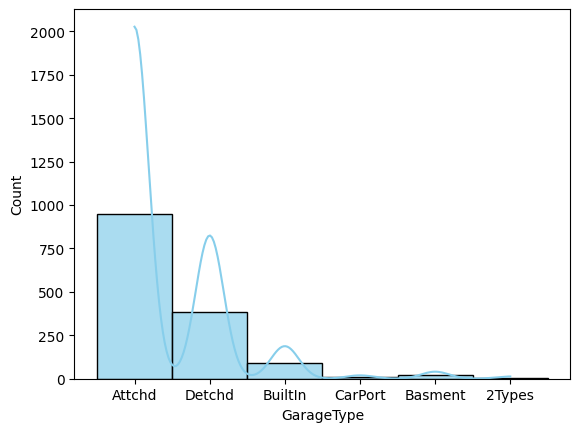

In [116]:
sns.histplot(df['GarageType'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    Unf
Name: GarageFinish, dtype: object


<Axes: xlabel='GarageFinish', ylabel='count'>

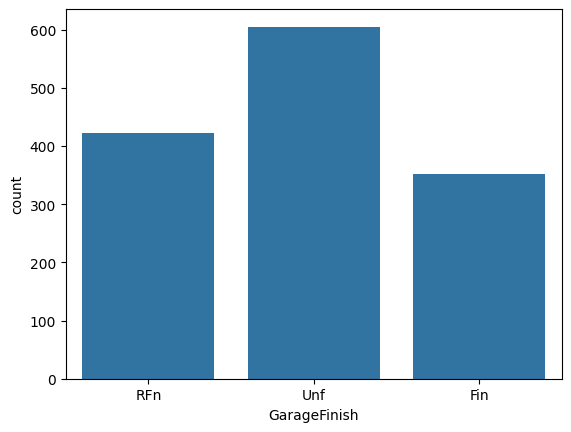

In [62]:
print(df['GarageFinish'].mode())
sns.countplot(x = 'GarageFinish', data = df)

In [63]:
df['GarageFinish'] = df['GarageFinish'].fillna('Unf')
df['GarageFinish'].isnull().sum()

np.int64(0)

<Axes: xlabel='GarageFinish', ylabel='Count'>

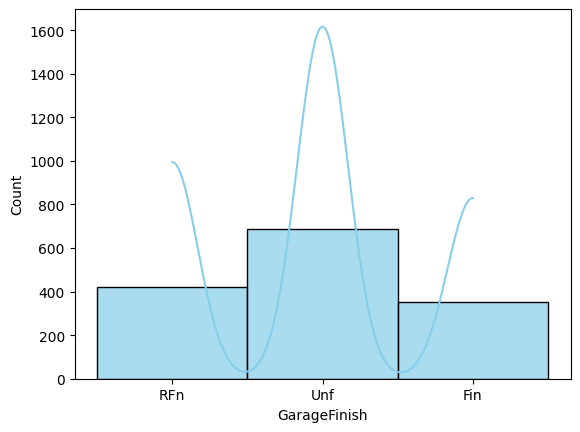

In [117]:
sns.histplot(df['GarageFinish'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    TA
Name: GarageQual, dtype: object


<Axes: xlabel='GarageQual', ylabel='count'>

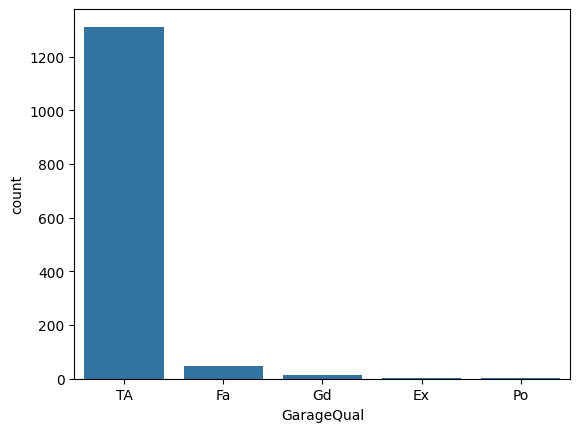

In [64]:
print(df['GarageQual'].mode())
sns.countplot(x = 'GarageQual', data = df)

In [65]:
df['GarageQual'] = df['GarageQual'].fillna('TA')
df['GarageQual'].isnull().sum()

np.int64(0)

<Axes: xlabel='GarageQual', ylabel='Count'>

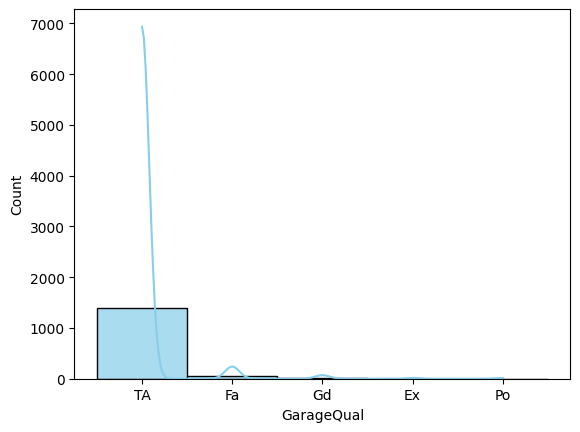

In [118]:
sns.histplot(df['GarageQual'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    TA
Name: GarageCond, dtype: object


<Axes: xlabel='GarageCond', ylabel='count'>

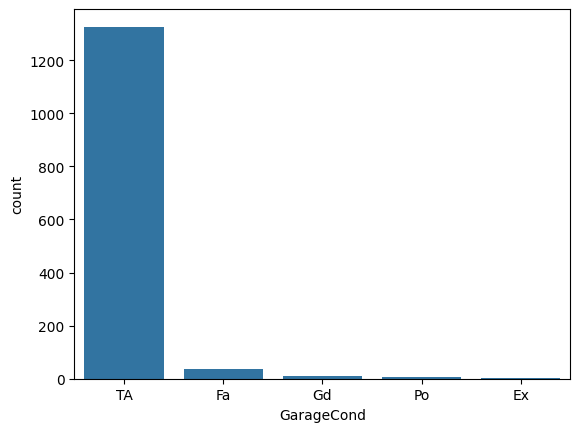

In [67]:
print(df['GarageCond'].mode())
sns.countplot(x = 'GarageCond', data = df)

In [68]:
df['GarageCond'] = df['GarageCond'].fillna('TA')
df['GarageCond'].isnull().sum()

np.int64(0)

<Axes: xlabel='GarageCond', ylabel='Count'>

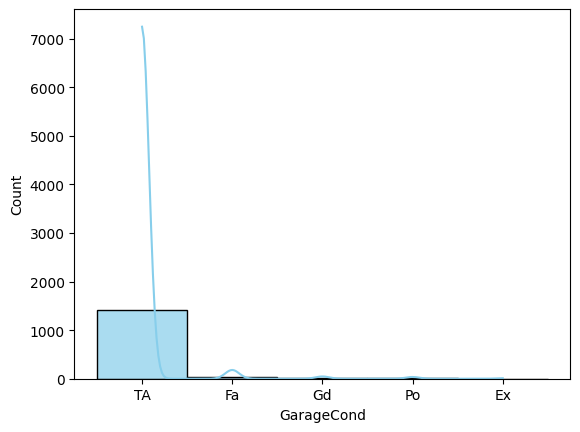

In [119]:
sns.histplot(df['GarageCond'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    Gd
Name: PoolQC, dtype: object


<Axes: xlabel='PoolQC', ylabel='count'>

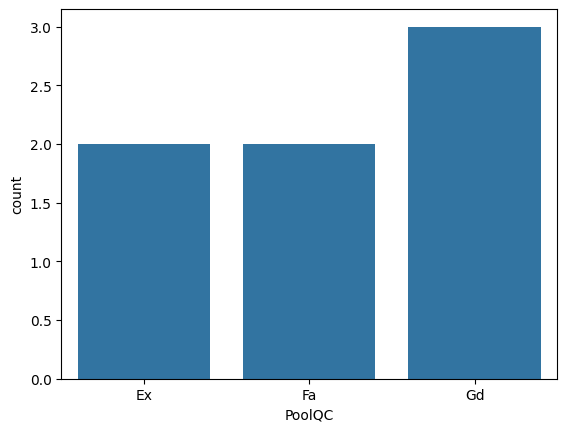

In [70]:
print(df['PoolQC'].mode())
sns.countplot( x = 'PoolQC', data = df)

In [71]:
df['PoolQC'] = df['PoolQC'].fillna('Gd')
df['PoolQC'].isnull().sum()

np.int64(0)

<Axes: xlabel='PoolQC', ylabel='Count'>

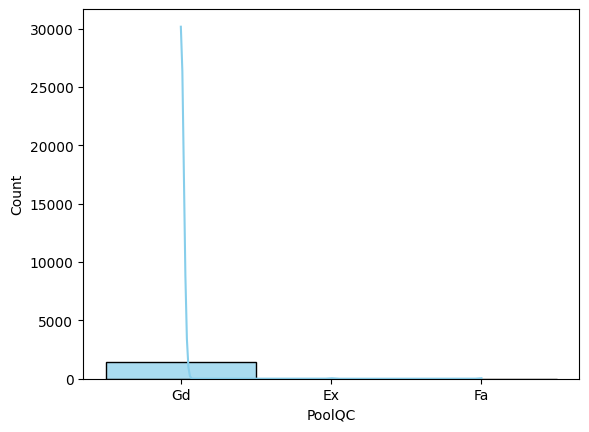

In [120]:
sns.histplot(df['PoolQC'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    Unf
Name: BsmtFinType2, dtype: object


<Axes: xlabel='BsmtFinType2', ylabel='count'>

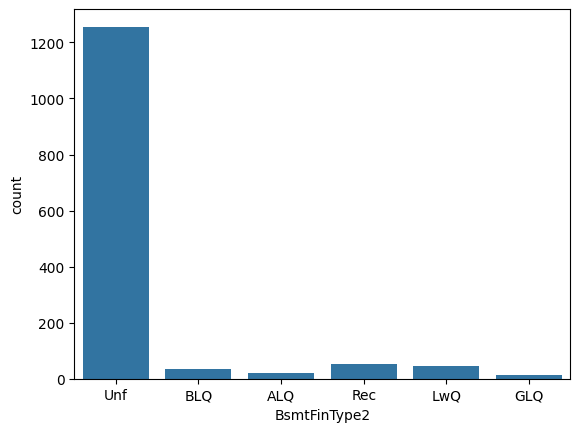

In [72]:
print(df['BsmtFinType2'].mode())
sns.countplot(x = 'BsmtFinType2', data = df)

In [73]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')
df['BsmtFinType2'].isnull().sum()

np.int64(0)

<Axes: xlabel='BsmtFinType2', ylabel='Count'>

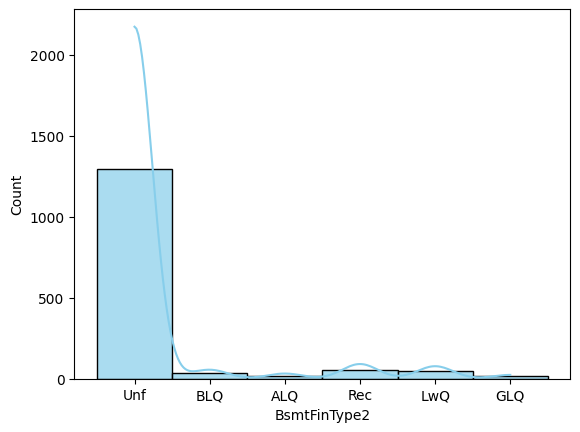

In [121]:
sns.histplot(df['BsmtFinType2'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    Unf
Name: BsmtFinType1, dtype: object


<Axes: xlabel='BsmtFinType1', ylabel='count'>

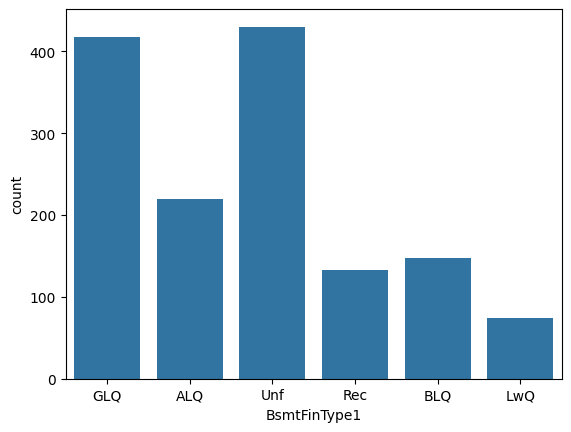

In [75]:
print(df['BsmtFinType1'].mode())
sns.countplot(x = 'BsmtFinType1', data = df)

In [76]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Unf')
df['BsmtFinType1'].isnull().sum()

np.int64(0)

<Axes: xlabel='BsmtFinType1', ylabel='Count'>

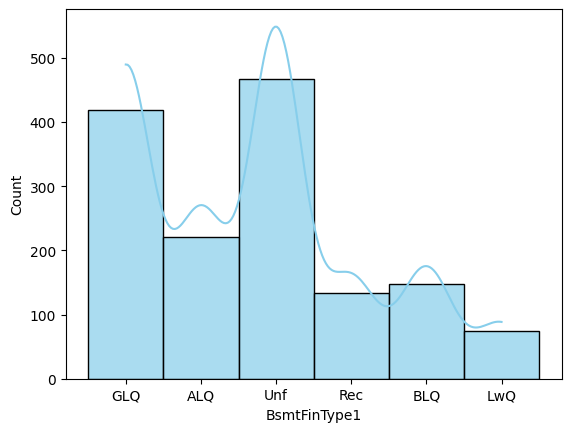

In [122]:
sns.histplot(df['BsmtFinType1'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    No
Name: BsmtExposure, dtype: object


<Axes: xlabel='BsmtExposure', ylabel='count'>

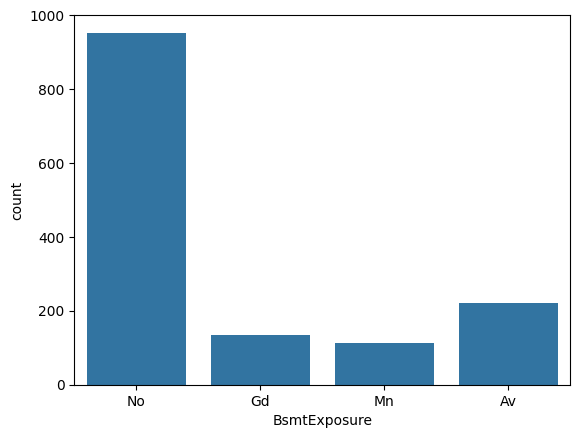

In [77]:
print(df['BsmtExposure'].mode())
sns.countplot(x = 'BsmtExposure', data = df)

In [78]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['BsmtExposure'].isnull().sum()

np.int64(0)

<Axes: xlabel='BsmtExposure', ylabel='Count'>

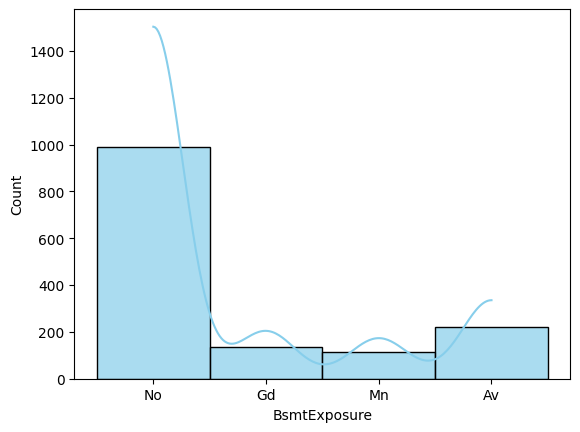

In [123]:
sns.histplot(df['BsmtExposure'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    TA
Name: BsmtCond, dtype: object


<Axes: xlabel='BsmtCond', ylabel='count'>

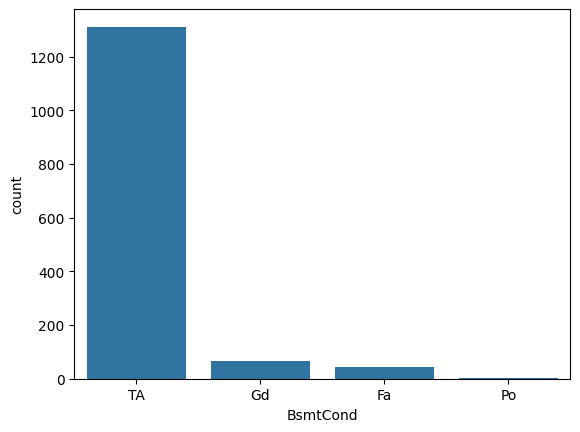

In [79]:
print(df['BsmtCond'].mode())
sns.countplot(x = 'BsmtCond', data = df)

In [80]:
df['BsmtCond'] = df['BsmtCond'].fillna('TA')
df['BsmtCond'].isnull().sum()

np.int64(0)

<Axes: xlabel='BsmtCond', ylabel='Count'>

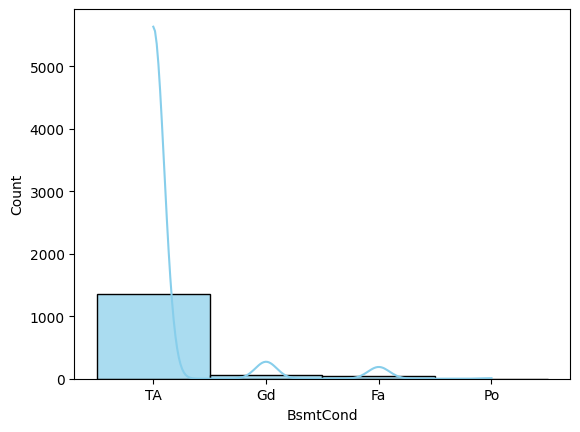

In [124]:
sns.histplot(df['BsmtCond'], kde=True, bins=10, color='skyblue', alpha=0.7)

0    TA
Name: BsmtQual, dtype: object


<Axes: xlabel='BsmtQual', ylabel='count'>

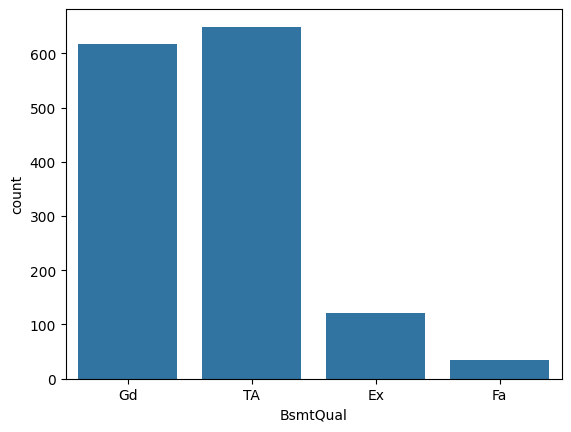

In [81]:
print(df['BsmtQual'].mode())
sns.countplot(x = 'BsmtQual', data = df)

In [83]:
df['BsmtQual'] = df['BsmtQual'].fillna('TA')
df['BsmtQual'].isnull().sum()

np.int64(0)

<Axes: xlabel='BsmtQual', ylabel='Count'>

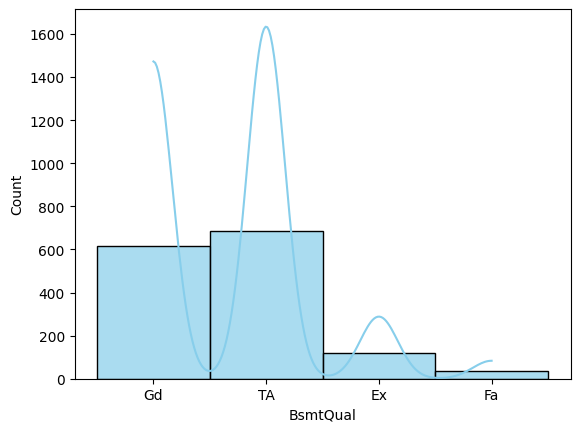

In [125]:
sns.histplot(df['BsmtQual'], kde=True, bins=10, color='skyblue', alpha=0.7)

In [86]:
for col in ['Electrical']:
    df['Electrical'].fillna('No value', inplace = True) 

C:\Users\gkris\AppData\Local\Temp\ipykernel_22128\1732276877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna('No value', inplace = True)


<Axes: xlabel='Electrical', ylabel='Count'>

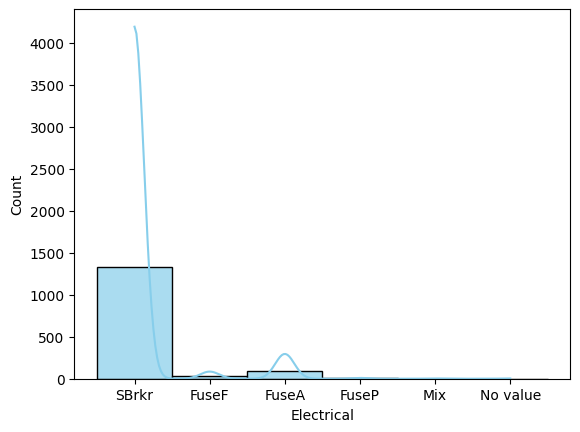

In [126]:
sns.histplot(df['Electrical'], kde=True, bins=10, color='skyblue', alpha=0.7)

In [87]:
df[Numerical_columns].isnull().sum().sort_values(ascending = False)

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [88]:
df[Categorical_columns].isnull().sum().sort_values(ascending = False)

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

### Simple Imputer

* The SimpleImputer class in scikit-learn is a straightforward way to handle missing values in a dataset by replacing them with a specified value, such as the mean, median, mode, or a constant.

In [89]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
from sklearn.impute import SimpleImputer

numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns

In [97]:
num_imputer = SimpleImputer(strategy='mean')  
cat_imputer = SimpleImputer(strategy='most_frequent')

In [101]:
df1[numerical_cols] = num_imputer.fit_transform(df1[numerical_cols])

df1[categorical_cols] = cat_imputer.fit_transform(df1[categorical_cols])

In [102]:
print("\nDataFrame after Imputation:")
print(df1)


DataFrame after Imputation:
          Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1.0        60.0       RL         65.0   8450.0   Pave  Grvl      Reg   
1        2.0        20.0       RL         80.0   9600.0   Pave  Grvl      Reg   
2        3.0        60.0       RL         68.0  11250.0   Pave  Grvl      IR1   
3        4.0        70.0       RL         60.0   9550.0   Pave  Grvl      IR1   
4        5.0        60.0       RL         84.0  14260.0   Pave  Grvl      IR1   
...      ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456.0        60.0       RL         62.0   7917.0   Pave  Grvl      Reg   
1456  1457.0        20.0       RL         85.0  13175.0   Pave  Grvl      Reg   
1457  1458.0        70.0       RL         66.0   9042.0   Pave  Grvl      Reg   
1458  1459.0        20.0       RL         68.0   9717.0   Pave  Grvl      Reg   
1459  1460.0        20.0       RL         75.0   9937.0   Pave  Grvl      Reg   

In [103]:
df1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64